In [2]:
import pandas as pd

In [3]:
landmark = pd.read_csv('landmark_features.csv')

In [4]:
landmark.head()

,jaw_width,face_height,cheekbone_width,nose_width,mouth_width,mouth_height,eye_distance,left_eye_width,right_eye_width,face_width_to_height,mouth_to_nose_ratio,image
0,237.002110,210.287898,237.008439,52.009614,120.016666,58.034473,62.008064,46.173586,42.107007,1.127036,2.307586,img_1066_face0.jpg
1,226.035395,200.010000,220.002273,51.000000,104.076895,38.052595,62.072538,43.011626,41.048752,1.130120,2.040723,img_1585_face0.jpg
2,241.101638,209.193690,239.075302,42.011903,87.005747,32.062439,65.000000,42.107007,43.011626,1.152528,2.070978,img_3852_face0.jpg
3,229.490741,198.494332,229.176788,53.037722,80.056230,12.000000,54.083269,42.011903,41.012193,1.156158,1.509421,img_1857_face0.jpg
4,235.552542,201.613492,235.766834,48.041649,77.524190,27.892651,60.299254,34.014703,41.194660,1.168337,1.613687,img_4196_face0.jpg


In [5]:
landmark.describe()

,jaw_width,face_height,cheekbone_width,nose_width,mouth_width,mouth_height,eye_distance,left_eye_width,right_eye_width,face_width_to_height,mouth_to_nose_ratio
count,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000,3717.000000
mean,244.043833,201.873089,242.101048,48.641773,97.340980,31.720416,62.210723,42.939905,42.980170,1.212722,2.002365
std,15.323604,14.843674,15.448514,4.856362,14.137112,9.840152,3.965298,3.165622,3.094506,0.083473,0.226113
min,65.007692,50.009999,64.007812,12.000000,22.022716,1.000000,15.033296,9.000000,10.049876,0.982046,1.263816
25%,234.173013,192.439601,232.034480,45.044423,86.023253,24.020824,60.000000,41.048752,41.109610,1.154089,1.839499
50%,244.073759,203.194488,242.297338,49.000000,97.046381,31.000000,62.032250,43.046487,43.046487,1.207101,1.999547
75%,254.017716,213.712424,252.097203,52.009614,109.000000,39.012818,65.007692,45.011110,45.011110,1.266411,2.155593
max,301.240767,265.936083,296.249895,68.593003,137.178716,77.006493,86.313383,54.589376,60.207973,1.676125,2.767085


In [6]:
race_age = pd.read_csv('FairFace/test_outputs_new.csv')

In [7]:
race_age.head()

,face_name_align,race,gender,age,race_scores,gender_scores,age_scores
0,detected_faces/img_1066_face0.jpg,White,Female,20-29,[9.8033935e-01 2.0030593e-03 1.0377353e-03 1.6...,[5.4785627e-04 9.9945217e-01],[3.7038589e-07 6.5349865e-05 2.9006056e-02 8.7...
1,detected_faces/img_1585_face0.jpg,White,Male,20-29,[9.1880059e-01 9.0394691e-03 9.5979478e-03 6.2...,[9.9999839e-01 1.5665543e-06],[7.1303305e-09 7.1659256e-06 5.2407872e-02 9.2...
2,detected_faces/img_3852_face0.jpg,White,Female,20-29,[9.9451208e-01 2.0380740e-04 9.0291799e-04 4.3...,[4.5797435e-05 9.9995422e-01],[1.8634896e-07 1.7384573e-05 1.1829613e-02 4.9...
3,detected_faces/img_1857_face0.jpg,East Asian,Male,30-39,[3.6361493e-02 1.3025706e-03 4.4896486e-03 9.5...,[9.9924606e-01 7.5392768e-04],[1.9817328e-06 3.7691127e-05 4.0276805e-03 1.5...
4,detected_faces/img_4196_face0.jpg,White,Male,20-29,[8.76439333e-01 8.79140862e-05 5.83360030e-04 ...,[9.994057e-01 5.943532e-04],[2.1014996e-06 3.6792291e-05 4.4489806e-03 6.4...


In [8]:
race_age_filter = race_age[['face_name_align','race', 'gender', 'age']].rename(columns={'face_name_align':'image', 'gender':'pred_gender'})

In [9]:
race_age_filter['image'] = race_age_filter['image'].str.split('/').str[-1]
race_age_filter.head()

,image,race,pred_gender,age
0,img_1066_face0.jpg,White,Female,20-29
1,img_1585_face0.jpg,White,Male,20-29
2,img_3852_face0.jpg,White,Female,20-29
3,img_1857_face0.jpg,East Asian,Male,30-39
4,img_4196_face0.jpg,White,Male,20-29


In [10]:
features_tot = pd.merge(landmark, race_age_filter, on='image', how='inner')

In [11]:
bmi  = pd.read_csv('FairFace/Data/data.csv')
bmi.head()

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [12]:
bmi['key'] = bmi['name'].str.split('.').str[0]
bmi.head()

,Unnamed: 0,bmi,gender,is_training,name,key
0,0,34.207396,Male,1,img_0.bmp,img_0
1,1,26.453720,Male,1,img_1.bmp,img_1
2,2,34.967561,Female,1,img_2.bmp,img_2
3,3,22.044766,Female,1,img_3.bmp,img_3
4,4,37.758789,Female,1,img_4.bmp,img_4


In [13]:
features_tot['key'] = features_tot['image'].str.split('_').str[0] + '_' + features_tot['image'].str.split('_').str[1]
features_tot

,jaw_width,face_height,cheekbone_width,nose_width,mouth_width,mouth_height,eye_distance,left_eye_width,right_eye_width,face_width_to_height,mouth_to_nose_ratio,image,race,pred_gender,age,key
0,237.002110,210.287898,237.008439,52.009614,120.016666,58.034473,62.008064,46.173586,42.107007,1.127036,2.307586,img_1066_face0.jpg,White,Female,20-29,img_1066
1,226.035395,200.010000,220.002273,51.000000,104.076895,38.052595,62.072538,43.011626,41.048752,1.130120,2.040723,img_1585_face0.jpg,White,Male,20-29,img_1585
2,241.101638,209.193690,239.075302,42.011903,87.005747,32.062439,65.000000,42.107007,43.011626,1.152528,2.070978,img_3852_face0.jpg,White,Female,20-29,img_3852
3,229.490741,198.494332,229.176788,53.037722,80.056230,12.000000,54.083269,42.011903,41.012193,1.156158,1.509421,img_1857_face0.jpg,East Asian,Male,30-39,img_1857
4,235.552542,201.613492,235.766834,48.041649,77.524190,27.892651,60.299254,34.014703,41.194660,1.168337,1.613687,img_4196_face0.jpg,White,Male,20-29,img_4196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,264.047344,194.041233,260.069222,43.000000,77.025970,22.000000,60.008333,49.010203,45.099889,1.360780,1.791302,img_70_face0.jpg,White,Male,20-29,img_70
3713,255.096060,207.060378,251.017928,50.039984,113.110565,40.112342,63.031738,41.303753,38.000000,1.231989,2.260404,img_4118_face0.jpg,White,Female,20-29,img_4118
3714,220.445004,153.834326,216.187419,50.039984,89.140339,16.124515,61.032778,41.773197,40.311289,1.433003,1.781382,img_1810_face0.jpg,White,Female,20-29,img_1810
3715,244.000000,194.023194,242.008264,56.008928,113.017698,25.000000,66.000000,46.010868,42.000000,1.257582,2.017851,img_3815_face0.jpg,White,Female,20-29,img_3815


In [14]:
final_dat = pd.merge(features_tot, bmi, on='key', how='inner')

In [15]:
final_dat.head()

,jaw_width,face_height,cheekbone_width,nose_width,mouth_width,mouth_height,eye_distance,left_eye_width,right_eye_width,face_width_to_height,...,image,race,pred_gender,age,key,Unnamed: 0,bmi,gender,is_training,name
0,237.002110,210.287898,237.008439,52.009614,120.016666,58.034473,62.008064,46.173586,42.107007,1.127036,...,img_1066_face0.jpg,White,Female,20-29,img_1066,1066,41.191406,Female,1,img_1066.bmp
1,226.035395,200.010000,220.002273,51.000000,104.076895,38.052595,62.072538,43.011626,41.048752,1.130120,...,img_1585_face0.jpg,White,Male,20-29,img_1585,1585,24.658895,Male,1,img_1585.bmp
2,241.101638,209.193690,239.075302,42.011903,87.005747,32.062439,65.000000,42.107007,43.011626,1.152528,...,img_3852_face0.jpg,White,Female,20-29,img_3852,3852,39.151259,Female,0,img_3852.bmp
3,229.490741,198.494332,229.176788,53.037722,80.056230,12.000000,54.083269,42.011903,41.012193,1.156158,...,img_1857_face0.jpg,East Asian,Male,30-39,img_1857,1857,25.845588,Male,1,img_1857.bmp
4,235.552542,201.613492,235.766834,48.041649,77.524190,27.892651,60.299254,34.014703,41.194660,1.168337,...,img_4196_face0.jpg,White,Male,20-29,img_4196,4196,36.243556,Male,0,img_4196.bmp


In [16]:
final_dat.columns

Index(['jaw_width', 'face_height', 'cheekbone_width', 'nose_width',
       'mouth_width', 'mouth_height', 'eye_distance', 'left_eye_width',
       'right_eye_width', 'face_width_to_height', 'mouth_to_nose_ratio',
       'image', 'race', 'pred_gender', 'age', 'key', 'Unnamed: 0', 'bmi',
       'gender', 'is_training', 'name'],
      dtype='object')

In [17]:
final_dat.drop(columns=['key', 'image', 'name', 'gender', 'Unnamed: 0', 'is_training'], inplace=True)

In [18]:
# One hot encode categorical variables
race_dummies = pd.get_dummies(final_dat['race'], prefix='race').astype(int)
gender_dummies = pd.get_dummies(final_dat['pred_gender'], prefix='gender').astype(int)
age_dummies = pd.get_dummies(final_dat['age'], prefix='age').astype(int)

# Combine with original numeric features
final_dat_encoded = pd.concat([
    final_dat.drop(['race', 'pred_gender', 'age'], axis=1),
    race_dummies,
    gender_dummies,
    age_dummies
], axis=1)

final_dat_encoded

,jaw_width,face_height,cheekbone_width,nose_width,mouth_width,mouth_height,eye_distance,left_eye_width,right_eye_width,face_width_to_height,...,race_Latino_Hispanic,race_White,gender_Female,gender_Male,age_10-19,age_20-29,age_3-9,age_30-39,age_40-49,age_50-59
0,237.002110,210.287898,237.008439,52.009614,120.016666,58.034473,62.008064,46.173586,42.107007,1.127036,...,0,1,1,0,0,1,0,0,0,0
1,226.035395,200.010000,220.002273,51.000000,104.076895,38.052595,62.072538,43.011626,41.048752,1.130120,...,0,1,0,1,0,1,0,0,0,0
2,241.101638,209.193690,239.075302,42.011903,87.005747,32.062439,65.000000,42.107007,43.011626,1.152528,...,0,1,1,0,0,1,0,0,0,0
3,229.490741,198.494332,229.176788,53.037722,80.056230,12.000000,54.083269,42.011903,41.012193,1.156158,...,0,0,0,1,0,0,0,1,0,0
4,235.552542,201.613492,235.766834,48.041649,77.524190,27.892651,60.299254,34.014703,41.194660,1.168337,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,264.047344,194.041233,260.069222,43.000000,77.025970,22.000000,60.008333,49.010203,45.099889,1.360780,...,0,1,0,1,0,1,0,0,0,0
3708,255.096060,207.060378,251.017928,50.039984,113.110565,40.112342,63.031738,41.303753,38.000000,1.231989,...,0,1,1,0,0,1,0,0,0,0
3709,220.445004,153.834326,216.187419,50.039984,89.140339,16.124515,61.032778,41.773197,40.311289,1.433003,...,0,1,1,0,0,1,0,0,0,0
3710,244.000000,194.023194,242.008264,56.008928,113.017698,25.000000,66.000000,46.010868,42.000000,1.257582,...,0,1,1,0,0,1,0,0,0,0


In [19]:
final_dat_encoded.columns

Index(['jaw_width', 'face_height', 'cheekbone_width', 'nose_width',
       'mouth_width', 'mouth_height', 'eye_distance', 'left_eye_width',
       'right_eye_width', 'face_width_to_height', 'mouth_to_nose_ratio', 'bmi',
       'race_Black', 'race_East Asian', 'race_Latino_Hispanic', 'race_White',
       'gender_Female', 'gender_Male', 'age_10-19', 'age_20-29', 'age_3-9',
       'age_30-39', 'age_40-49', 'age_50-59'],
      dtype='object')

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features
X = scaler.fit_transform(final_dat_encoded.drop(columns=['bmi']))
X = pd.DataFrame(X, columns=final_dat_encoded.drop(columns=['bmi']).columns)
y = final_dat_encoded['bmi']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 55.06
R² Score: 0.22


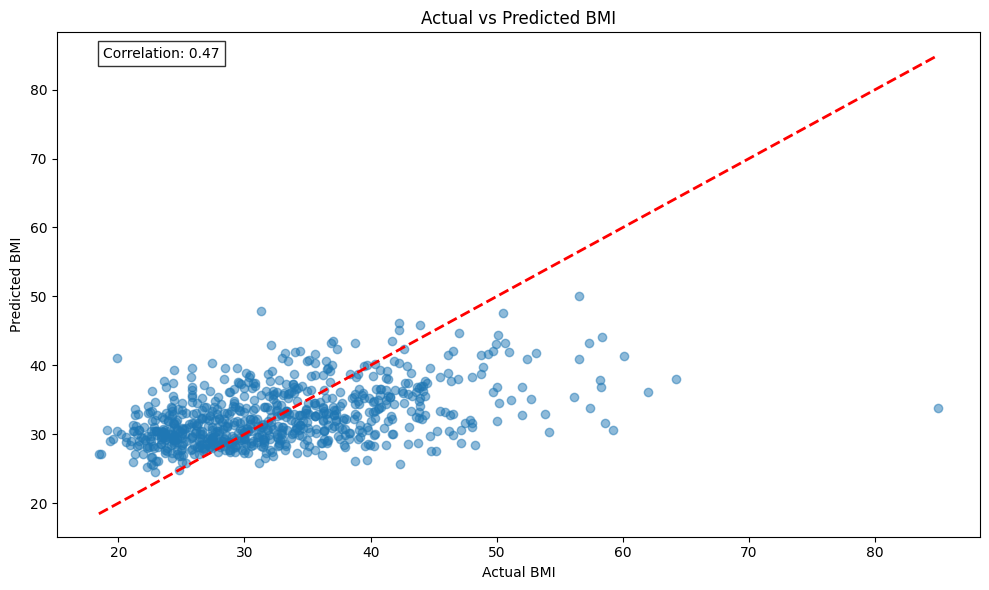

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Add labels and title
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.title('Actual vs Predicted BMI')

# Add correlation coefficient
corr = np.corrcoef(y_test, y_pred)[0,1]
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

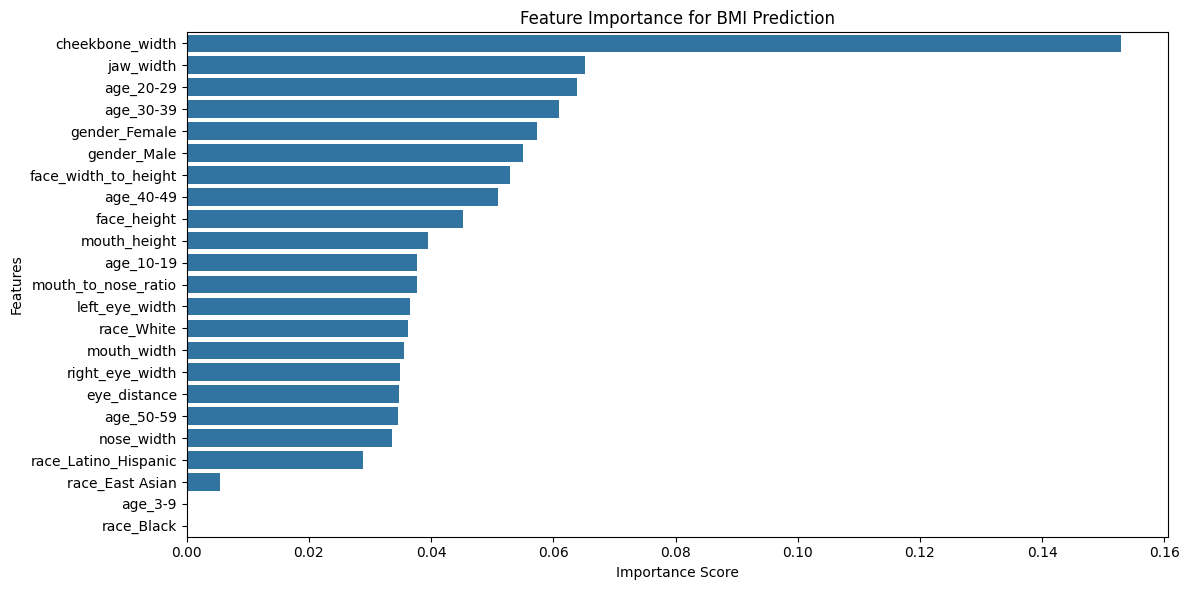

In [30]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for BMI Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()